| **Chapter**                   | 2:  Simple compartmental models                       |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 2.x: SIRFD model                                      |
| **Package prerequisites**     | None                                                  |


# SIRFD model

\begin{equation}
        \frac{dS}{dt} =    - \beta S I - \varphi S F
\end{equation}

\begin{equation}
        \frac{dI}{dt} =    \beta S I + \varphi S F - \gamma I
\end{equation}

\begin{equation}
        \frac{dR}{dt} =    \gamma (1 - \mu) I
\end{equation}

\begin{equation}
        \frac{dF}{dt} =     \gamma \mu I
\end{equation}

\begin{equation}
        \frac{dD}{dt} =     F \frac{1}{\tau_F}
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [2]:
def deriv(t, y, beta, gamma, mu, phi, tau_F):
    S, I, R, F, D = y
    dSdt = - beta * S * I - phi * S * F
    dIdt = beta * S * I + phi * S * F - gamma * I
    dRdt = gamma * I * (1 - mu)
    dFdt = gamma * mu * I - F/tau_F
    dDdt = F / tau_F

    return dSdt, dIdt, dRdt, dFdt, dDdt

In [3]:
I_0 = 0.001
S_0 = 1 - I_0
R_0, D_0, F_0 = 0, 0, 0.0

y_0 = (S_0, I_0, R_0, F_0, D_0)

R0 = 2.5
tau = 8
gamma = 1/tau
beta = R0 * gamma
phi = 2 * R0 * gamma
tau_F = 6
mu = 0.4

In [4]:
data = {}

for i in [1, 3, 5, 7]:
    res = solve_ivp(fun=deriv, t_span = (0, 100), y0=y_0, args=(beta, gamma, mu, phi, i), max_step=1)    
    data[i] = [res.t, res.y[1]]

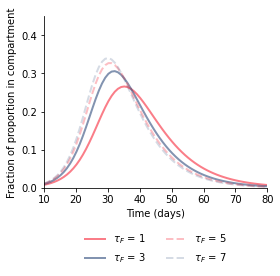

In [5]:
fig = plt.figure(facecolor="w", figsize=(4, 4.5))

ax = fig.add_subplot(111, axisbelow=True)

for idx in range(1,5):
    t, I = data[list(data.keys())[idx - 1]][0], data[list(data.keys())[idx - 1]][1]
    ax.plot(t, I, color=COLORS[["I", "S"][(idx - 1) % 2]], alpha=1 - (idx * 0.2), lw=2, label=f"$\\tau_F$ = {list(data.keys())[idx - 1]}", linestyle=["solid", "dashed"][0 if idx <= 2 else 1])

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_ylim(0, 0.45)
ax.set_xlim(10, 80)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.5), loc="lower center", ncol=2, frameon=False)

fig.subplots_adjust(bottom=0.35)

plt.savefig("sirfd_integral_small.pdf", dpi=900)
plt.show()